<a href="https://colab.research.google.com/github/muh-fajri/muh-fajri/blob/main/Mini_Course_DA_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Read data and Cleaning data**

In [148]:
# Read Google Sheet data
sheet_url = 'https://docs.google.com/spreadsheets/d/1HhjTyN49jP20O5uOWOmMEneGGTXrQlS_Uwg1WuIySis/edit#gid=1485085913'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(sheet_url_trf)

df = pd.read_csv(sheet_url_trf)
df.head()

https://docs.google.com/spreadsheets/d/1HhjTyN49jP20O5uOWOmMEneGGTXrQlS_Uwg1WuIySis/export?format=csv&gid=1485085913


,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic


In [149]:
len(df)

177

In [150]:
# Remove record that has NaN value
df.dropna(inplace=True)

df_cleaned = df.copy()
df_cleaned.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
5,World of Warcraft,14.0,Warcraft,11/1/2004,MMORPG,Blizzard Entertainment,Blizzard Entertainment
6,Half-Life 2,12.0,Half-Life,11/1/2004,First-person shooter,Valve,Valve (digital)
7,The Witcher 3: Wild Hunt,12.0,The Witcher,5/1/2015,Action role-playing,CD Projekt Red,CD Projekt


In [151]:
len(df_cleaned)

141

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 1 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       141 non-null    object 
 1   Sales      141 non-null    float64
 2   Series     141 non-null    object 
 3   Release    141 non-null    object 
 4   Genre      141 non-null    object 
 5   Developer  141 non-null    object 
 6   Publisher  141 non-null    object 
dtypes: float64(1), object(6)
memory usage: 8.8+ KB


In [153]:
# Copy columns
df.columns

Index(['Name', 'Sales', 'Series', 'Release', 'Genre', 'Developer',
       'Publisher'],
      dtype='object')

In [154]:
# Change type date
df_cleaned['Release'] = pd.to_datetime(df_cleaned['Release']) # convert to datetime format

print(df_cleaned.info())

"""
In Pandas, date coulmn that is mix in order still can be read.
But, if in date column using uncommon format, it have to further setup
in pd.to_datetime
"""

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 1 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       141 non-null    object        
 1   Sales      141 non-null    float64       
 2   Series     141 non-null    object        
 3   Release    141 non-null    datetime64[ns]
 4   Genre      141 non-null    object        
 5   Developer  141 non-null    object        
 6   Publisher  141 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 8.8+ KB
None


'\nIn Pandas, date coulmn that is mix in order still can be read.\nBut, if in date column using uncommon format, it have to further setup\nin pd.to_datetime\n'

In [155]:
# Check typo using loop for specific column: all in one
for col_name in ['Name', 'Sales', 'Series', 'Developer',
       'Publisher']:
  print(df_cleaned[col_name].value_counts(), '\n')

StarCraft II: Heart of the Swarm    2
StarCraft II: Legacy of the Void    2
Minecraft                           1
Command & Conquer: Tiberian Sun     1
Crusader Kings II                   1
                                   ..
Myst                                1
Lords of the Realm II               1
Caesar III                          1
Caesar II                           1
Zoo Tycoon                          1
Name: Name, Length: 139, dtype: int64 

1.0     62
2.0     28
3.0      9
4.0      6
2.5      4
1.5      3
6.0      3
11.0     2
1.2      2
1.3      2
5.5      2
5.0      2
12.0     2
1.1      1
1.8      1
14.0     1
2.1      1
3.3      1
2.7      1
10.0     1
3.6      1
20.0     1
6.5      1
7.0      1
8.0      1
9.0      1
33.0     1
Name: Sales, dtype: int64 

StarCraft                6
Command & Conquer        5
Civilization             4
Age of Empires           4
Warcraft                 3
                        ..
Alice                    1
Ark: Survival Evolved    1
B

In [156]:
df_cleaned.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
5,World of Warcraft,14.0,Warcraft,2004-11-01,MMORPG,Blizzard Entertainment,Blizzard Entertainment
6,Half-Life 2,12.0,Half-Life,2004-11-01,First-person shooter,Valve,Valve (digital)
7,The Witcher 3: Wild Hunt,12.0,The Witcher,2015-05-01,Action role-playing,CD Projekt Red,CD Projekt


In [157]:
# Export data cleaned to CSV
df_cleaned.to_csv('Games Sales - Case Study.csv', index=False)

## **EDA**

(1.a) The oldest games is Hydline.

In [158]:
df_cleaned.iloc[df_cleaned['Release'].argmin()]

Name                                       Hydlide
Sales                                          1.0
Series                                     Hydlide
Release                        1984-12-01 00:00:00
Genre                          Action role-playing
Developer    Technology and Entertainment Software
Publisher    Technology and Entertainment Software
Name: 133, dtype: object

(1.b) The newest games is Crusader Kings III.

In [159]:
df_cleaned.iloc[df_cleaned['Release'].argmax()]

Name                 Crusader Kings III
Sales                               1.0
Series                   Crusader Kings
Release             2020-09-01 00:00:00
Genre                    Grand strategy
Developer    Paradox Development Studio
Publisher           Paradox Interactive
Name: 110, dtype: object

(2) Publisher that published most of the games is Electronic Arts.

In [160]:
most_publisher = df_cleaned['Publisher'].value_counts()
most_publisher.head()

Electronic Arts           19
Blizzard Entertainment    10
Activision                 6
GT Interactive             5
Paradox Interactive        4
Name: Publisher, dtype: int64

(3) Developer that developed most of the games is Blizzard Entertainment.

In [161]:
most_developer = df_cleaned['Developer'].value_counts()
most_developer.head()

Blizzard Entertainment        10
Maxis                          6
Valve                          4
Paradox Development Studio     4
id Software                    4
Name: Developer, dtype: int64

(4) Series that has the most sales is Minecraft.

In [162]:
most_sales_of_series = df_cleaned.groupby('Series', as_index=False)['Sales'].sum().sort_values(by=['Sales'], ascending=False)
most_sales_of_series.head()

,Series,Sales
47,Minecraft,33.0
22,Diablo,26.0
75,The Sims,24.0
36,Half-Life,21.0
68,StarCraft,21.0


(5) Series that has the most games is StarCraf.

In [163]:
most_games_of_series = df_cleaned.groupby('Series', as_index=False)['Name'].count().sort_values(by=['Name'], ascending=False)
most_games_of_series.head()

,Series,Name
68,StarCraft,6
13,Command & Conquer,5
2,Age of Empires,4
12,Civilization,4
20,Dark Souls,3


### **Create Visualization**

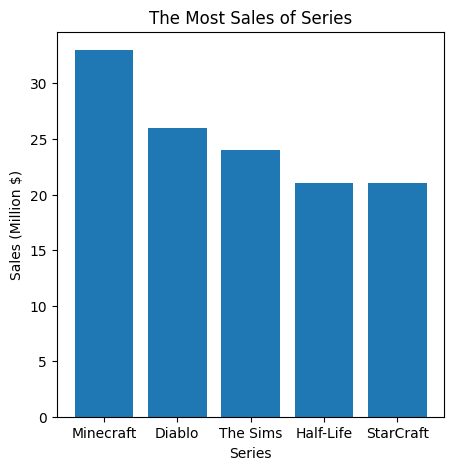

In [164]:
# Create plot (using matplotlib.pyplot)
plt.rcParams["figure.figsize"] = (5,5)

plt.bar('Series','Sales', data=most_sales_of_series.head())
plt.title('The Most Sales of Series')
plt.xlabel('Series')
plt.ylabel('Sales (Million $)')
plt.show()

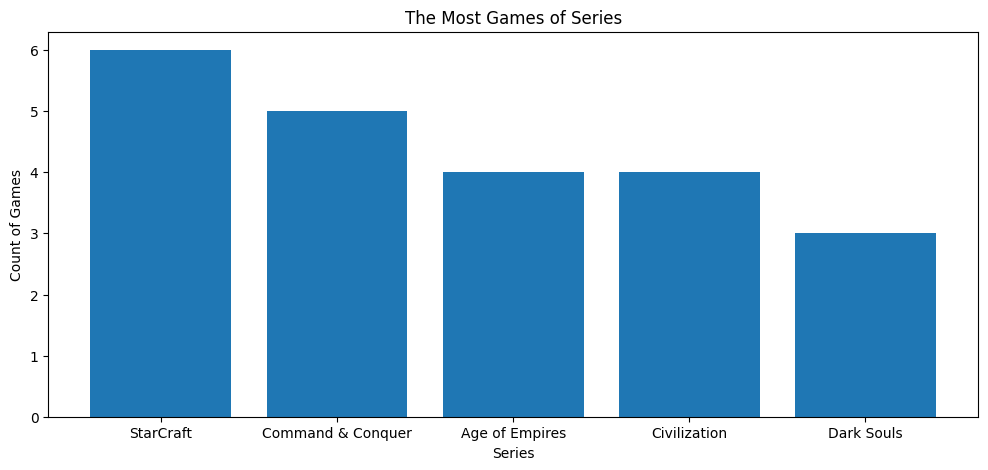

In [165]:
# Create plot (using matplotlib.pyplot)
plt.rcParams["figure.figsize"] = (12,5)

plt.bar('Series','Name', data=most_games_of_series.head())
plt.title('The Most Games of Series')
plt.xlabel('Series')
plt.ylabel('Count of Games')
plt.show()